# **Pendahuluan**

Pertama-tama dalam proyek ini saya menggunakan dataset yang diperoleh dari [kaggle](https://www.kaggle.com/) yaitu data [Electric Power Consumption](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption).

Data dari link kaggel tersebut akan dicopy API nya untuk diambil datanya berikut API dari Electric Power Consumption : (kaggle datasets download -d fedesoriano/electric-power-consumption)

Berikut API Token yang diperoleh dari kaggle : [Kaggle API Token](https://drive.google.com/file/d/1OnxF8SKCfAsk5b2iBSU2v3NoIvWdwZjZ/view?usp=sharing)

# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import time
from tensorflow import keras
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dropout

# **Menarik Data Dari Kaggle Dengan API Command**

### Berikut cara menarik dataset yang bersumber dari kaggle :

*   Klik ikon folder disebelah kiri *sidebar* google colab
*   Klik kanan dan pilih *'New Folder'* lalu beri nama folder tersebut dengan nama kaggle
*   Klik folder yang sudah dibuat tadi dan kemudian klik kanan lalu pilih *upload* dan pilih file **kaggle.json** (untuk memperoleh file kaggle.json ini harus login ke akun kaggle yang anda miliki lalu pilih setting dan pada menu setting pilih API dan create token maka akan langsung terunduh file kaggle.json)

Jika sudah maka selanjutnya mengikuti cara seperti dibawah berikut

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d fedesoriano/electric-power-consumption

electric-power-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip electric-power-consumption.zip

Archive:  electric-power-consumption.zip
replace powerconsumption.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: powerconsumption.csv    


In [7]:
df_electric = pd.read_csv('/content/powerconsumption.csv')

In [8]:
df_electric

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [9]:
df_electric['Datetime'] = pd.to_datetime(df_electric['Datetime'])

In [10]:
# Cek apakah ada data yang null
df_electric.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [11]:
# Cek info datasetnya
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [12]:
# Ubah data pada kolom tanggal kedalam bentuk array
tgl = df_electric['Datetime'].values
norm_tgl = tgl.reshape(-1,1)
norm_tgl

array([['2017-01-01T00:00:00.000000000'],
       ['2017-01-01T00:10:00.000000000'],
       ['2017-01-01T00:20:00.000000000'],
       ...,
       ['2017-12-30T23:30:00.000000000'],
       ['2017-12-30T23:40:00.000000000'],
       ['2017-12-30T23:50:00.000000000']], dtype='datetime64[ns]')

In [13]:
# Ubah data pada kolom humidity kedalam bentuk array
hum = df_electric['Humidity'].values.reshape(-1,1)
hum

array([[73.8],
       [74.5],
       [74.5],
       ...,
       [72.8],
       [73. ],
       [74.1]])

In [14]:
# Normalisasikan data pada humidity dengan menggunakan StandardScaler
scaler = StandardScaler()
normalized_hum = scaler.fit_transform(hum)
print(normalized_hum)

[[0.35627749]
 [0.40129059]
 [0.40129059]
 ...
 [0.29197306]
 [0.30483395]
 [0.37556882]]


In [15]:
# jadikan array data humidity yang sudah di normalisasikan
normalized_hum_array = normalized_hum.flatten()
norm_hum = normalized_hum_array.reshape(-1,1)
norm_hum

array([[0.35627749],
       [0.40129059],
       [0.40129059],
       ...,
       [0.29197306],
       [0.30483395],
       [0.37556882]])

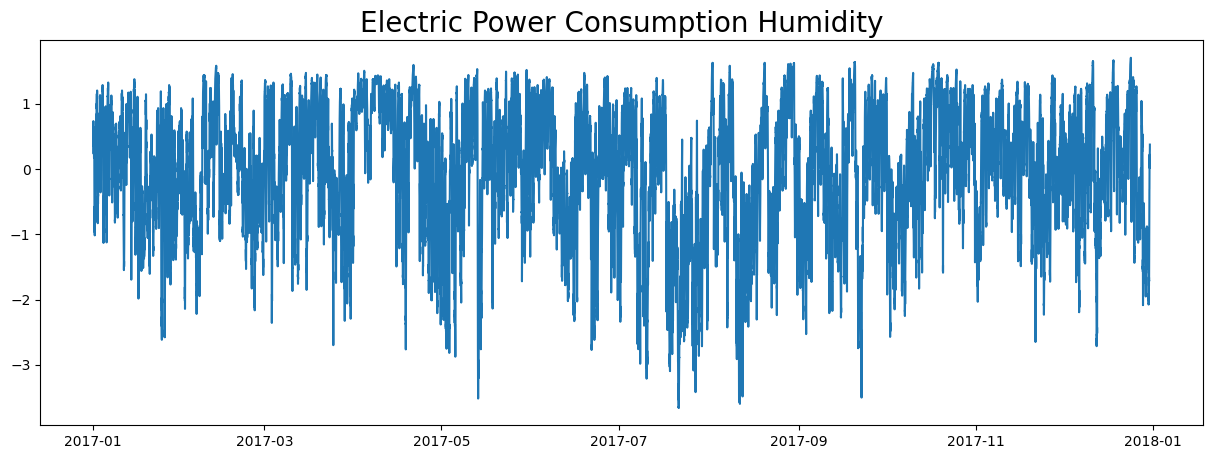

In [16]:
# Visualisasikan data tanggal dan humidity dengan menggunakan matplotlib
plt.figure(figsize=(15, 5))
plt.plot(norm_tgl, norm_hum)
plt.title('Electric Power Consumption Humidity',
          fontsize=20);

# **Train Test Split Data**

Untuk pembagian datanya adalah validation set 20% dari total dataset

In [17]:
tgl_train, tgl_val, hum_train, hum_val = train_test_split(norm_tgl, norm_hum, test_size=0.2, shuffle=False)

In [18]:
# Mengetahui total data train dan validasi

print('total tgl_train : ', len(tgl_train))
print('total tgl_val : ',len(tgl_val))
print('total hum_train : ', len(hum_train))
print('total hum_val : ',len(hum_val))

total tgl_train :  41932
total tgl_val :  10484
total hum_train :  41932
total hum_val :  10484


# **Threshold MAE**

model memiliki nilai MAE < 10% skala data, untuk mengetahuinya dapat dilakukan dengan kode berikut:

In [19]:
# Mengetahui nilai terbesar dan terkecil dari data

print('Data Maksimal StandarScaler Humidity :', norm_hum.max())
print('Data Minimal StandarScaler Humidity :',norm_hum.min())

Data Maksimal StandarScaler Humidity : 1.7066704603796614
Data Minimal StandarScaler Humidity : -3.6601770269062768


In [20]:
threshold_mae = (norm_hum.max() - norm_hum.min()) * 10/100
threshold_mae

0.5366847487285937

# **Fungsi untuk mengubah data agar formatnya dapat diterima oleh model**

In [21]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)  # Menambahkan dimensi terakhir
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))  # Menyesuaikan bentuk output
    return ds.batch(batch_size).prefetch(1)

# **Model Time Series**

In [22]:
# buat arsitektur model dengan Bidirectional LSTM

train_set = windowed_dataset(hum_train, window_size=100, batch_size=200, shuffle_buffer=5000)
val_set = windowed_dataset(hum_val, window_size=100, batch_size=200, shuffle_buffer=5000)

model_epc = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=(None, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [23]:
# buat optimizer,loss, dan metrics menggunakan MAE pada model
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model_epc.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=['mae'])

In [24]:
# buat callback untuk mengetahui jika MAE sesuai dengan Threshold yang ditentukan
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< threshold_mae):
      print("\nMean Absolute Error (MAE) telah mencapai <10% skala data!")
      self.model.stop_training = True
callbacks = myCallback()

In [25]:
# ujicoba model yang telah dibuat di atas
start = time.time()
history_epc = model_epc.fit(train_set, validation_data=val_set, batch_size=128, epochs=100, verbose=2, callbacks=[callbacks])

stop = time.time()
print(f"Lama Waktu Training yang Dibutuhkan: {round((stop - start)/60)}minute")

Epoch 1/100

Mean Absolute Error (MAE) telah mencapai <10% skala data!
210/210 - 445s - loss: 0.0470 - mae: 0.2084 - val_loss: 0.0116 - val_mae: 0.1048 - 445s/epoch - 2s/step
Lama Waktu Training yang Dibutuhkan: 7minute


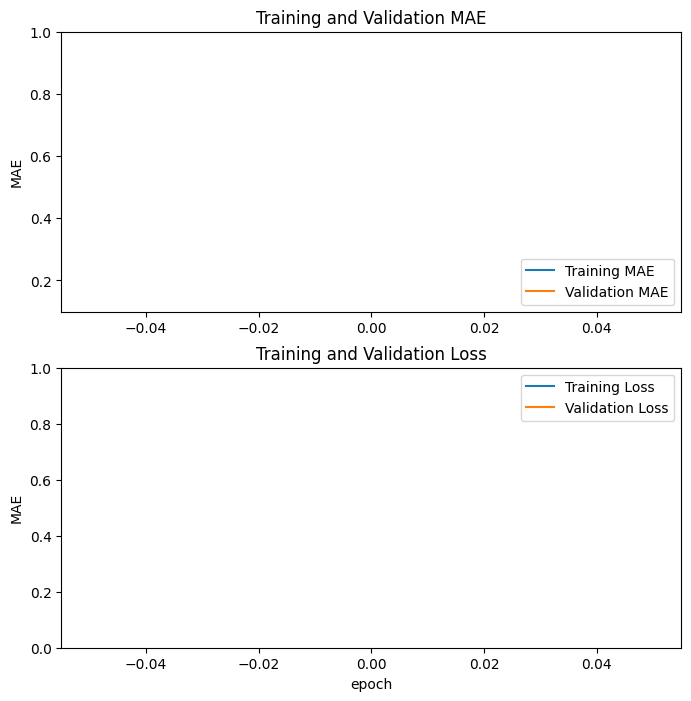

In [26]:
# Buat Plot loss dan MAE nya
acc = history_epc.history['mae']
val_acc = history_epc.history['val_mae']

loss = history_epc.history['loss']
val_loss = history_epc.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training MAE')
plt.plot(val_acc, label='Validation MAE')
plt.legend(loc='lower right')
plt.ylabel('MAE')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation MAE')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('MAE')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()